# Data 118 - Winter 2022
# Homework 7: A/B testing and fuzzy matching (50 points)

**Reading**: Textbook chapter [12](https://inferentialthinking.com/chapters/12/Comparing_Two_Samples.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the needed functions. Each time you start your server, you will need to execute this cell again to load them.  

Homework 7 is due Tuesday, March 8 at 9:00am. Late work will not be accepted without prior arrangements.  

In [1]:
# Don't change this cell; just run it. 

import numpy as np
import pandas as pd

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
# Worked with Josh Bowen, Adil Kassim

## 1. Birth weight data (25 points)

We discussed in class a dataset that contains the following variables for 1,174 mother-baby pairs: the baby’s birth weight in ounces, the number of gestational days, the mother’s age in completed years, the mother’s height in inches, pregnancy weight in pounds, and whether or not the mother smoked during pregnancy. 


In [3]:
baby_df = pd.read_csv('baby.csv')
print(baby_df.shape)
baby_df.head(10)

(1174, 6)


,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False
5,138,244,33,62,178,False
6,132,245,23,65,140,False
7,120,289,25,62,125,False
8,143,299,30,66,136,True
9,140,351,27,68,120,False


The analysis in class (a permutation test for the difference in means) showed that there is strong evidence for unequal distributions of birth weights for smoker and non-smoker mothers. Here we will investigate differences in BMI between mothers who smoked and did not.

Body Mass Index (BMI) is a person’s weight in kilograms divided by the square of height in meters.  BMI can be used to screen for weight categories that may lead to health problems but it is not diagnostic of the health of an individual.

#### Question 1

Calculate the BMI for the mothers in this dataset add it as a column called `bmi`

In [37]:
birth_weight_kg = baby_df['Maternal Pregnancy Weight'].apply(lambda x: x * 0.453592) # converts weight from lbs to kg
maternal_height_m = baby_df['Maternal Height'].apply(lambda x: x * 0.0254) # converts height from in to m
bmi = birth_weight_kg/np.square(maternal_height_m) # calculates BMI for each value in both columns -->
                                                    # baby_df['Maternal Pregnancy Weight'] and baby_df['Maternal Height']

In [38]:
baby_df["bmi"] = bmi # adds BMI column to dataset

Text(0, 0.5, 'Count')

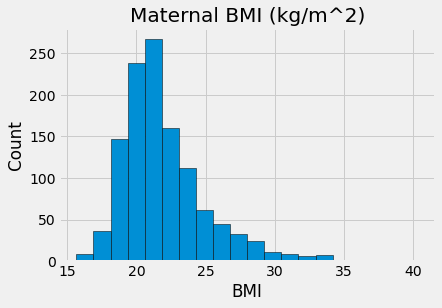

In [39]:
# histogram plot of maternal BMI
plt.hist(baby_df["bmi"], bins=20, edgecolor = 'black')
# Labels/Title
plt.title('Maternal BMI (kg/m^2)')
plt.xlabel('BMI')
plt.ylabel('Count')
# x = BMI
# y = count of mothers

#### Question 2

Generate two plots: (i) overlapping histograms of mother BMI for smokers and non-smokers; (ii) back-to-back boxplots of mother BMI for smokers and non-smokers.

Interpret the plots.


In [40]:
a = baby_df.groupby("Maternal Smoker")

smoking = a.get_group(True)

nonsmoking = a.get_group(False)

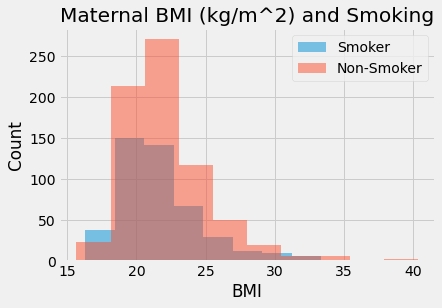

In [41]:
# histograms for BMI for smokers and non-smokers

plt.hist(smoking['bmi'], alpha = 0.5)

plt.hist(nonsmoking['bmi'], alpha = 0.5)

# Labels/Titles
plt.title('Maternal BMI (kg/m^2) and Smoking')
plt.xlabel('BMI')
plt.ylabel('Count')

# Legend
plt.legend(('Smoker', 'Non-Smoker'), loc='upper right')

Text(0.5, 1.0, 'Box Plot Maternal BMI (kg/m^2) and Smoking')

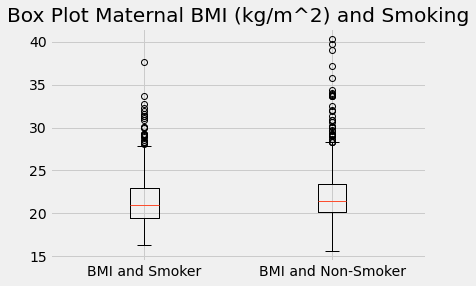

In [42]:
a = baby_df.groupby("Maternal Smoker")

smoking = a.get_group(True)

nonsmoking = a.get_group(False)

# boxplots

plt.boxplot([smoking['bmi'], nonsmoking['bmi']], labels = ["BMI and Smoker", "BMI and Non-Smoker"])
plt.title('Box Plot Maternal BMI (kg/m^2) and Smoking')

#### Question 3 (quantile plots)

Plot the empirical inverse cumulative distribution (quanitle plots) of BMI for the smoker and nonsmoker subsets.  Make sure you label the two groups and the axes.  Interpret the result.

In [43]:
xfine= np.arange(0,1,.001)

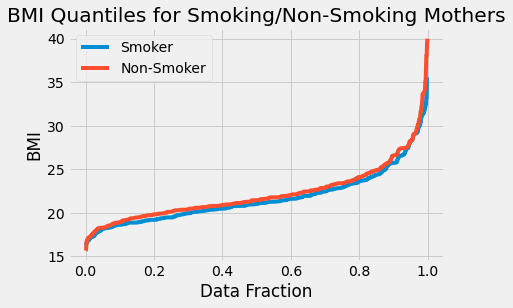

In [44]:
# Plotting quantile plots

plt.plot(xfine, np.quantile(smoking['bmi'], xfine, interpolation = 'midpoint'), label = 'Smoking')
plt.plot(xfine, np.quantile(nonsmoking['bmi'], xfine, interpolation = 'midpoint'), label = 'Non-Smoking')

# Labels/Titles/Legend

plt.title('BMI Quantiles for Smoking/Non-Smoking Mothers')
plt.xlabel('Data Fraction')
plt.ylabel('BMI')
plt.legend(('Smoker', 'Non-Smoker'), loc = 'upper left')

In [45]:
baby_df["Maternal Smoker"].value_counts()

False    715
True     459
Name: Maternal Smoker, dtype: int64

In [46]:
# We have 715 nonsmokers and 459 smokers in the dataset.

#### Question 4 (difference of sample means)

We want to investigate if the distributions of the BMI in mothers who smoke and mother who do not smoke are the same. 

Consider the null hypothesis that the two types are in fact drawn from the same distribution.  This is something we can assume and make calculations from.

Let us first examine the following test statistic: **the difference in BMI sample means** (between smokers and non-smokers).  

You can start by randomly permuting the rows of baby_df:


In [47]:
scrambledbaby_df = baby_df.iloc[np.random.permutation(len(baby_df))]
scrambled_smoking = scrambledbaby_df.groupby('Maternal Smoker').get_group(True)
scrambled_nonsmoking = scrambledbaby_df.groupby('Maternal Smoker').get_group(False) 

Then divide this into "scrambled-nonsmoker" and "scrambled-smoker" samples of size 715 and 459 .
The distribution of the differences of the means of the scrambled-smoker and scrambled-nonsmoker groups
give you the distribution of the difference-of-sample-means test statistic when the distributions are the same
and contain all of the values of the observed data.

Write the code that generates a null distribution for this test statistic and calculate the p-value associated with this test statistic.

0.0046


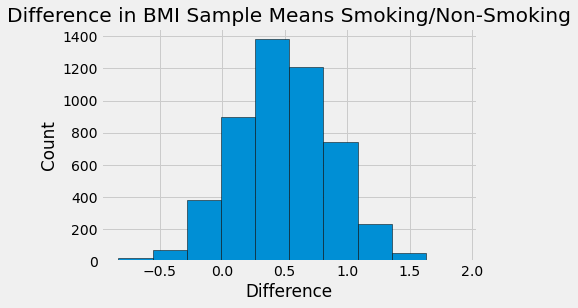

In [50]:
means = np.array([])

for a in range(5000):
    smoking_samp = scrambled_smoking['bmi'].sample(frac=0.2, replace = False)
    nonsmoking_samp = scrambled_nonsmoking['bmi'].sample(frac=0.2, replace = False)
    
    mean = np.mean(nonsmoking_samp) - np.mean(smoking_samp)
    means = np.append(means, mean)

plt.hist(means, edgecolor = 'black')

plt.title('Difference in BMI Sample Means Smoking/Non-Smoking')
plt.xlabel('Difference')
plt.ylabel('Count')

diff = np.mean(smoking.bmi) - np.mean(nonsmoking.bmi)
p = np.count_nonzero(means <= diff) / 5000
print(p)

#### Question 5 (medians)

Repeat what is asked in Question 3 for the following test statistic: **the difference in BMI sample medians**.

0.0048


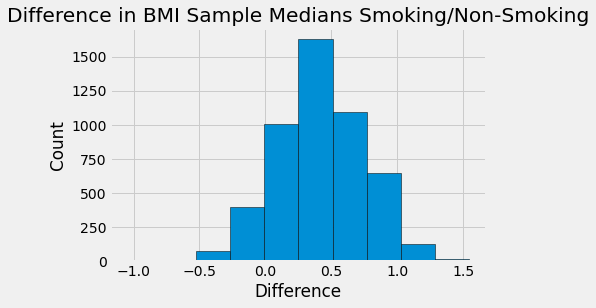

In [54]:
medians = np.array([])

for i in range(5000):
    smoking_samp = scrambled_smoking['bmi'].sample(frac=0.2, replace = False)
    nonsmoking_samp = scrambled_nonsmoking['bmi'].sample(frac=0.2, replace = False)
    
    median = np.median(nonsmoking_samp) - np.median(smoking_samp)
    medians = np.append(medians, median)

plt.hist(medians, edgecolor = 'black')

plt.title('Difference in BMI Sample Medians Smoking/Non-Smoking')
plt.xlabel('Difference')
plt.ylabel('Count')

diff = np.median(smoking.bmi) - np.median(nonsmoking.bmi)
p = np.count_nonzero(medians <= diff) / 5000
print(p)

#### Question 6 (standard deviations)

Repeat what is asked in Question 3 for the following test statistic: **the difference in BMI sample standard deviations**.

0.029


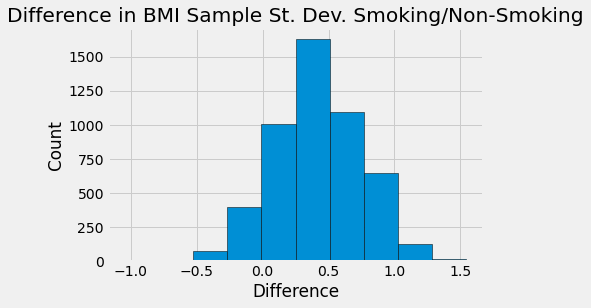

In [55]:
stdev = np.array([])

for i in range(5000):
    smoking_samp = scrambled_smoking['bmi'].sample(frac=0.2, replace = False)
    nonsmoking_samp = scrambled_nonsmoking['bmi'].sample(frac=0.2, replace = False)
    
    std = np.std(nonsmoking_samp) - np.std(smoking_samp)
    stdev = np.append(medians, median)

plt.hist(stdev, edgecolor = 'black')

plt.title('Difference in BMI Sample St. Dev. Smoking/Non-Smoking')
plt.xlabel('Difference')
plt.ylabel('Count')

diff = np.std(smoking.bmi) - np.std(nonsmoking.bmi)
p = np.count_nonzero(stdev <= diff) / 5000
print(p)

#### Question 7

All of the p values are less than 5%, which indicates a very strong probability that the results are stistically significant. Conversely, this indicates that there is a very low probability that the results occured due to random chance. The p-values for BMI sample means, medians, and standard deviations are 0.0046, 0.0048, and 0.029 respectively. This means there is a more than 99% chance that the data produced for the difference of BMI in means and medians is statistically significant; there's a 97.1% chance that the data produced for the differences of BMI in standard deviations is statistically significant

## 2. Plagiarism detector (25 points) 

We will use the matching techniques discussed in Lecture 15 to construct **a naive plagiarism detector**. We modified the code from the class notebook in two ways: (i) we generalized it to q-character tokens; and (ii) we use spaces instead of #-signs to pad the ends of the strings.

This code allows you to calculate the Jaccard similarity for bigrams, trigrams etc.

In [56]:
#A Function to break a string into qgrams (q-character tokens)
#we'll pad the string with spaces on the front and end
def qgram(str,q):
    str = ' ' + str + ' '
    return([str[i:i+q] for i in range(len(str)-(q-1))])

#compute the jaccard similarity of two strings using qgrams
#pass in a value for q to do anything other than bi-grams
#call jaccard_simq with verbose set to True to see intermediate values

def jaccard_simq(str1, str2,q=2,verbose=False): 
    set1 = set(qgram(str1,q)) 
    set2 = set(qgram(str2,q))
    common_tokens = set1.intersection(set2)
    all_tokens = set1.union(set2)
    if verbose:
        print('set1 =',set1)
        print('set2 =',set2)
        print('Intersection =',common_tokens)
        print('Union =',all_tokens)
        print('Common Tokens =',len(common_tokens),
              'Total Tokens =',len(all_tokens))
    return float(len(common_tokens) / len(all_tokens))


To familiarize yourself with the function, you should try it on several examples and with different values of q. The `verbose=True` option is useful when you want to understand what the function is doing.

In [57]:
jaccard_simq('the quick brown fox','fox quick brown the',verbose=True)

set1 = {' t', 'br', 'he', 'k ', 'ui', 'ox', 'qu', 'e ', 'ow', 'n ', 'ro', 'th', 'ic', ' b', ' q', ' f', 'ck', 'wn', 'x ', 'fo'}
set2 = {' t', 'br', 'he', 'k ', 'ui', 'ox', 'qu', 'e ', 'ow', 'n ', 'ro', 'th', 'ic', ' b', ' f', ' q', 'ck', 'wn', 'x ', 'fo'}
Intersection = {' t', 'br', 'he', 'k ', 'ui', 'ox', 'qu', 'e ', 'ow', 'n ', 'ro', 'th', 'ic', ' b', ' f', ' q', 'ck', 'wn', 'x ', 'fo'}
Union = {' t', 'br', 'he', 'k ', 'ui', 'ox', 'qu', 'e ', 'ow', 'n ', 'ro', 'th', 'ic', ' b', ' q', ' f', 'ck', 'wn', 'x ', 'fo'}
Common Tokens = 20 Total Tokens = 20


1.0

In [58]:
jaccard_simq('the quick brown fox','fox quick brown the')

1.0

In [59]:
jaccard_simq('the quick brown fox','fox quick brown the',4,True)

set1 = {'wn f', 'fox ', 'ick ', 'brow', 'n fo', 'own ', ' qui', 'the ', 'quic', 'he q', 'e qu', 'k br', 'ck b', 'uick', 'rown', ' bro', ' the', ' fox'}
set2 = {'fox ', 'ox q', 'n th', 'ick ', ' bro', 'brow', 'own ', ' qui', 'wn t', 'quic', 'the ', 'k br', 'ck b', 'uick', ' fox', 'x qu', 'rown', ' the'}
Intersection = {'fox ', 'brow', 'ick ', 'own ', ' qui', 'the ', 'quic', ' the', 'k br', 'ck b', 'uick', ' bro', 'rown', ' fox'}
Union = {'wn f', 'n th', 'brow', 'n fo', ' qui', 'the ', 'quic', 'e qu', 'k br', 'ck b', ' fox', 'rown', ' the', 'fox ', 'ox q', 'ick ', 'own ', 'he q', 'uick', ' bro', 'x qu', 'wn t'}
Common Tokens = 14 Total Tokens = 22


0.6363636363636364

In [60]:
jaccard_simq('the quick brown fox','fox quick brown the',10)

0.2

The goal of this exercise is to use this function to investigate possible plagiarism in a homework assignment. A homework question asked students to define PageRank. The instructors were worried that the students will copy the answer from Wikipedia, so they decided to use that as a reference. The relevant part of the Wikipedia entry is saved in the file `original.txt` and the command below reads that file into a string.

In [61]:
open("original.txt","r",encoding="utf8").read()

'PageRank is a link analysis algorithm used by the Google Internet search engine that assigns a numerical weighting to each element of a hyperlinked set of documents, such as the World Wide Web, with the purpose of "measuring" its relative importance within the set. The algorithm may be applied to any collection of entities with reciprocal quotations and references. The numerical weight that it assigns to any given element E is also called the PageRank of E and denoted by PR(E).\nThe name "PageRank" is a trademark of Google, and the PageRank process has been patented (U.S. Patent 6,285,999 ). However, the patent is assigned to Stanford University and not to Google. Google has exclusive license rights on the patent from Stanford University. The university received 1.8 million shares in Google in exchange for use of the patent; the shares were sold in 2005 for $336 million.\nGoogle describes PageRank:\n“ \tPageRank relies on the uniquely democratic nature of the web by using its vast lin

Files containing the answer of five students (A,B,C,D, and E) are provided. They are read as strings using the code below. 

In [62]:
original=open("original.txt","r").read()
studentA=open("studentA.txt","r").read()
studentB=open("studentB.txt","r").read()
studentC=open("studentC.txt","r").read()
studentD=open("studentD.txt","r").read()
studentE=open("studentE.txt","r").read()

#### Question 8

One decision to make is the choice of q in the Jaccard similarity (whether to use 2-character tokens, 20-character tokens etc.) 

Write one advantage and one disadvantage when using 2-character tokens.

Write one advantage and one disadvantage when using 20-character tokens.

2 - character tokens --> advantages
- small vector space
- easier to understand/clean/manipulate

2 - character tokens --> disadvantages
- may catch plagiarism when not there
- tokens are very small has a greater change of false case of plagiarism

20 - character tokens --> advantages
- more accurate in catching plagiarism b/c more characters copied
- significant cases of plagiarism will be accurately identified

20 - character tokens --> disadvantages
- less amount of identified cases since the standard is higher
- higher standard of large intervals may miss smaller/minor cases of plagiarism

#### Question 9

Calculate the Jaccard similarities between each of the five student responses and the original Wikipedia article for all q between 2 and 20.

Save the results in a dataframe with rows indexed by the values of q, and having a column for each student answer showing the similarity of that student answer and the original for each value of q.   Your dataframe should have 19 populated rows with 5 columns.

In [68]:
# put your code to create and output the dataframe here
new_list = []

for a in range(2, 21):
    jsim_A = jaccard_simq(original, studentA, q=a)
    jsim_B = jaccard_simq(original, studentB, q=a)
    jsim_C = jaccard_simq(original, studentC, q=a)
    jsim_D = jaccard_simq(original, studentD, q=a)
    jsim_E = jaccard_simq(original, studentE, q=a)
    jsim_list = [jsim_A, jsim_B, jsim_C, jsim_D, jsim_E]
    new_list.append(jsim_list)
    
jaccard_df = pd.DataFrame(new_list)
jaccard_df.columns =['Student A', 'Student B', 'Student C', 'Student D', 'Student E']
jaccard_df

,Student A,Student B,Student C,Student D,Student E
0,0.713959,0.436647,0.449561,0.413242,0.454148
1,0.528192,0.261528,0.232156,0.244681,0.284700
2,0.457965,0.162698,0.128345,0.177140,0.200939
3,0.424920,0.108565,0.079377,0.150758,0.166093
4,0.402108,0.077730,0.048056,0.131777,0.147793
5,0.387012,0.054100,0.028373,0.118185,0.134663
6,0.374911,0.038706,0.015574,0.108296,0.125763
7,0.365854,0.026917,0.008417,0.100334,0.120944
8,0.358409,0.019473,0.003327,0.094076,0.117798
9,0.351749,0.014695,0.001004,0.088825,0.114250


#### Question 10

Draw a plot with five overlaid lines for the Jaccard similarities of the five texts. The plot should show the Jaccard similarities (on y-axis) against q (on x-axis). Make sure that it is clear which line corresponds to which student/answer.

Text(0.5, 1.0, 'Jaccard Similarities')

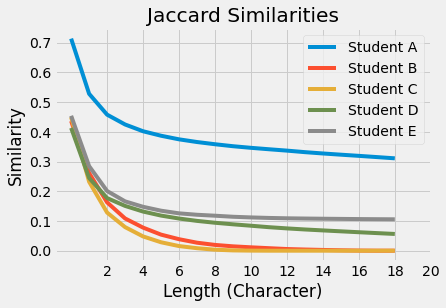

In [66]:
# the code to draw the plot
plt.plot(jaccard_df["Student A"], label="Student A")
plt.plot(jaccard_df["Student B"], label="Student B")
plt.plot(jaccard_df["Student C"], label="Student C")
plt.plot(jaccard_df["Student D"], label="Student D")
plt.plot(jaccard_df["Student E"], label="Student E")

plt.legend()
plt.xlabel("Length (Character)")
plt.ylabel("Similarity")
plt.xticks(np.arange(2, 50, 2.0))
plt.title("Jaccard Similarities")

#### Question 11

What do the similarity values you calculated say about the five students (A,B,C, D and E)? Is there evidence for plagiarism for any of them? Write a short discussion of your findings.


Student A had the highest similarity scores compared to the rest of the students. This indicates that they most likely plagiarized. Students B & E had the lowest similarity scores, indicating that they were the least likely to plagiarize. Students D & E had slightly higher scores than Students B & C, this might indicate some plagiarizing or perhaps it might be a coincidence? 


#### Question 12

Assume that the original text is fixed, but that different amounts of it are plagiarized.  How does the length of the plagiarized text impact the Jaccard similarities? For example, would a plagiarized short paper (1-2 sentences) typically have a different Jaccard similarity than a plagiarized long paper (few paragraphs)? Is this important for our five student scenario?

This is an open-ended question. You can answer it by changing the length of a plagiarized text and calculating similarities, you can argue it mathematically, or you can do some combination of these. 



Text(0.5, 1.0, 'Jaccard Similarities')

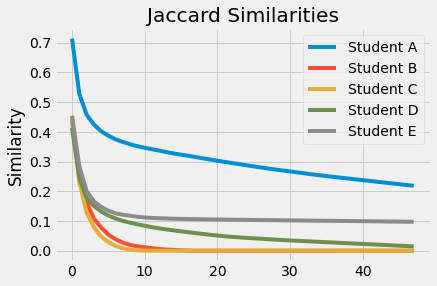

In [72]:
# if you use code to make your argument put it here
new_list = []

for a in range(2, 50):
    jsim_A = jaccard_simq(original, studentA, q=a)
    jsim_B = jaccard_simq(original, studentB, q=a)
    jsim_C = jaccard_simq(original, studentC, q=a)
    jsim_D = jaccard_simq(original, studentD, q=a)
    jsim_E = jaccard_simq(original, studentE, q=a)
    jsim_list = [jsim_A, jsim_B, jsim_C, jsim_D, jsim_E]
    new_list.append(jsim_list)
    
jaccard_df = pd.DataFrame(new_list)
jaccard_df.columns =['Student A', 'Student B', 'Student C', 'Student D', 'Student E']
jaccard_df

plt.plot(jaccard_df["Student A"], label="Student A")
plt.plot(jaccard_df["Student B"], label="Student B")
plt.plot(jaccard_df["Student C"], label="Student C")
plt.plot(jaccard_df["Student D"], label="Student D")
plt.plot(jaccard_df["Student E"], label="Student E")

plt.legend()
plt.ylabel("Similarity")
plt.title("Jaccard Similarities")

As you increase the length of the paper, and the length of the characters, the % similarity decreases which indicates an inverse relationship. Logically, this makes sense considering that the longer the paper, it is less likely different students will use the same characters and words. On the other hand, decreasing the amount of characters will increase the similarity by chance if multiple students inadvertedly started the sentence with the same character or common word (i.e. the, a, this, etc.) unless the paper is copied verbatim.